<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/ximen_0702_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
age age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol - s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level

```



In [77]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(scaled=False)
# pandas資料型態: 1. DataFrame(2d表格) 2. Series(1d列/行)
df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
df["y"] = diabetes["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [78]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#                  [5, 6, 7, 8],
#                  test_size=0.25)

# 我先把x(輸入)和y(輸出)分出來
# 第一種: 我拿到最後一個欄位的前面
# x_cols = df.columns[:-1]
# df[x_cols]
# 第二種: drop掉y(記得axis=0/1兩種方向)
x = df.drop("y", axis=1)
y = df["y"]
# 90%x 10%x 90%y 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [79]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.8333333333333334, 's5 <= 4.63\nsquared_error = 5794.414\nsamples = 397\nvalue = 150.751'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3217.083\nsamples = 202\nvalue = 109.896'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'bmi <= 28.05\nsquared_error = 4944.169\nsamples = 195\nvalue = 193.072'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

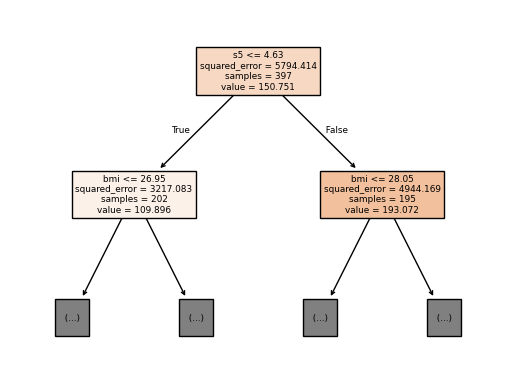

In [80]:
from sklearn.tree import plot_tree
plot_tree(reg,
          max_depth=1,
          feature_names=diabetes["feature_names"],
          filled=True)

回歸的metrics: 習慣使用r2 score
(因為r2 score是一個一致的度量)

認真猜的誤差

$ a = \frac{1}{n} \sum {(pre_i - y_i)^2} $

瞎猜(全猜平均的)誤差


$ b = \frac{1}{n} \sum {(\mu - y_i)^2} $

$ r2 = 1 - \frac{a}{b} $

最小0(爛) 最大1(好) 0.5以上就不錯

In [81]:
# metrics特點: 一致性
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print(pre)
r2_score(y_test, pre)

[105.37179487 105.37179487 171.86206897 183.73684211  84.98717949
  84.98717949 220.         183.73684211 238.82352941 105.37179487
 157.72222222 229.89473684 171.86206897  84.98717949 127.45833333
  84.98717949 280.5        229.89473684 229.89473684 105.37179487
 127.87096774 127.87096774 157.72222222 238.82352941  84.98717949
 127.87096774 171.86206897 280.5        238.82352941 105.37179487
 105.37179487 105.37179487  84.98717949 105.37179487 220.
 171.86206897  84.98717949 127.87096774 127.45833333 183.73684211
 229.89473684  84.98717949 280.5        157.72222222 127.45833333]


0.46268398628757